In [75]:
# Data source
# https://www.kaggle.com/c/titanic/data

# References
# http://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart
# http://chrisstrelioff.ws/sandbox/2015/06/08/decision_trees_in_python_with_scikit_learn_and_pandas.html

In [76]:
# Modules

import pandas as pd
from sklearn import tree
from sklearn import preprocessing

In [77]:
# Process raw data

# Read csv data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('gender_submission.csv')

# Get features
# Remove clearly unrelated features such as PassengerId or Name improves accuracy for Decision Tree
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
targets = ['Not Survived', 'Survived']

X = train[features]
y = train['Survived']

x = test[features]

# Encode string values so that DecisionTreeClassifier can work
# http://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html

def label_encode(df, col_names):
    
    les = {}
    
    for col_name in col_names:
    
        le = preprocessing.LabelEncoder()
        le.fit(df[col_name])
        df.loc[:, col_name] = le.transform(df[col_name])
    
        les[col_name] = le
        
        print('Encoded Feature Name: {col_name}'.format(col_name=col_name))
        print('Encoded Feature Classes: {classes}'.format(classes=le.classes_))
    
    return les

# Fill NaN values with string to avoid label encoding issues
# http://stackoverflow.com/questions/36808434/label-encoder-encoding-missing-values

# Try clearly out-of-range value -1.0 for continuous data 'Age'
# http://stackoverflow.com/questions/9365982/missing-values-in-scikits-machine-learning

X['Age'].fillna(-1.0, inplace=True)
X['Embarked'].fillna('None', inplace=True)

x['Age'].fillna(-1.0, inplace=True)
x['Embarked'].fillna('None', inplace=True)
x['Fare'].fillna(-1.0, inplace=True)

col_encodees = ['Sex', 'Embarked']

encoders = label_encode(X, col_encodees)

for col_encodee in col_encodees:
    x[col_encodee] = encoders[col_encodee].transform(x[col_encodee])

/Users/yth/anaconda/envs/101/lib/python3.5/site-packages/pandas/core/generic.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/yth/anaconda/envs/101/lib/python3.5/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Encoded Feature Name: Sex
Encoded Feature Classes: ['female' 'male']
Encoded Feature Name: Embarked
Encoded Feature Classes: ['C' 'None' 'Q' 'S']


/Users/yth/anaconda/envs/101/lib/python3.5/site-packages/ipykernel/__main__.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [78]:
# Show processed data

X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7.2500,3
1,1,0,38,1,0,71.2833,0
2,3,0,26,0,0,7.9250,3
3,1,0,35,1,0,53.1000,3
4,3,1,35,0,0,8.0500,3
5,3,1,-1,0,0,8.4583,2
6,1,1,54,0,0,51.8625,3
7,3,1,2,3,1,21.0750,3
8,3,0,27,0,2,11.1333,3
9,2,0,14,1,0,30.0708,0


In [79]:
# Doc ref: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# [criterion] 'entropy' (information gain) performs better than 'gini' by ~1.5%
# [max_depth] Setting None (unlimited) results in tree level up to 19 (overfitting)
# reduce max_depth to 5 levels increases accuracy by ~15%

clf = tree.DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1
)
clf = clf.fit(X, y)

In [80]:
# Use test data to calculate accuracy

prediction = clf.predict(x)
submission['Survived'] = prediction
submission
submission.to_csv('gender_submission.csv', index=False)

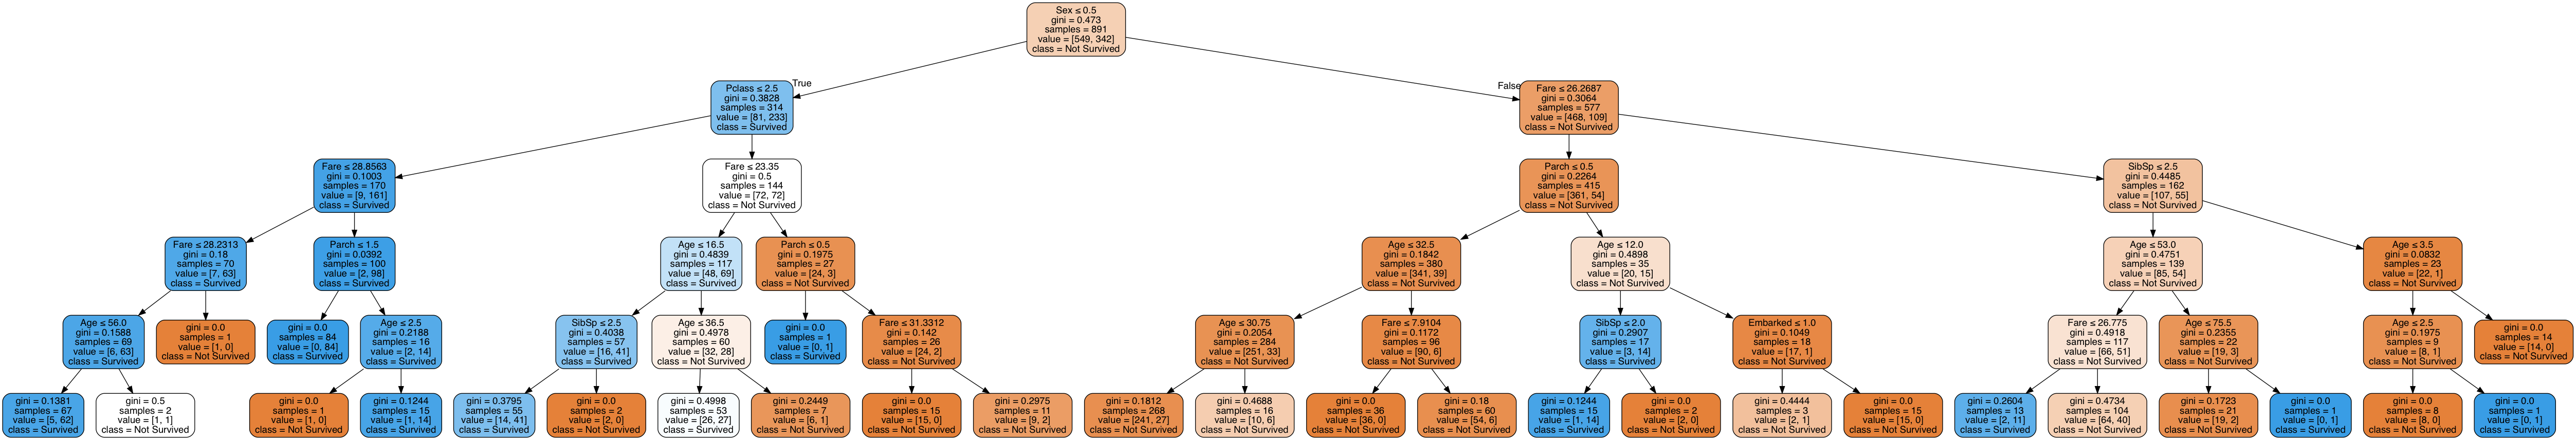

In [81]:
# Draw the Decision Tree
# The result tells us that gender has the most information gain in the first level of the tree
# How to interpret the graph: http://www.techtrek.io/machine-learning-part-2-visualizing-a-decision-tree/

import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=features,
    class_names=targets,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())